In [213]:
import pandas as pd
from shapely.geometry import Point, Polygon,LineString
import matplotlib.pyplot as plt
import geopandas as gpd 
import numpy as np
import json


In [237]:
arr = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/arrondissementsParis.csv", sep=",")
df_cpt_traffic = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/comptage_Traffic.csv", sep=";")
df_velo = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/comptage_Velo.csv", sep=",")
carb = pd.read_csv("C:/Users/pauli/Documents/M2/entrepot de donnees/datas/Prix_carburant2022Paris.csv", sep=";")

In [250]:
df_arr=arr.copy()
df_arr["X"]=df_arr["X"].str.replace(",", ".")
df_arr["Y"]=df_arr["Y"].str.replace(",", ".")

all_geo = [json.loads(str(item))['coordinates'][0] for item in df_arr["Geometry"]]
df_arr["geo_shape_list"] = all_geo
df_arr["geo_shape_list"] = df_arr["geo_shape_list"].apply(Polygon)
df_arr["geo_shape_list"]
test4 = gpd.GeoDataFrame(df_arr, geometry = df_arr["geo_shape_list"], crs="EPSG:4326")


0     [[2.364433128355796, 48.84614003688701], [2.36...
1     [[2.3258362544719646, 48.86956219698903], [2.3...
2     [[2.2993223102646487, 48.852174427333274], [2....
3     [[2.320902853673183, 48.863057390616895], [2.3...
4     [[2.3749133792570913, 48.83800895440248], [2.3...
5     [[2.333806501627019, 48.840609219799795], [2.3...
6     [[2.3962365763098297, 48.85415458748718], [2.3...
7     [[2.328007329038849, 48.86991742140716], [2.32...
8     [[2.3397765430833624, 48.882029347225085], [2....
9     [[2.3685123713934337, 48.85573412813671], [2.3...
10    [[2.2742644508277174, 48.878366927198435], [2....
11    [[2.412765012638637, 48.875474477493356], [2.4...
12    [[2.3638280960629254, 48.86750443060333], [2.3...
13    [[2.2951669125644556, 48.873955232398906], [2....
14    [[2.3445926774963546, 48.85404922924987], [2.3...
15    [[2.4138796243006073, 48.83357143972267], [2.4...
16    [[2.351518483670822, 48.8644258050741], [2.350...
17    [[2.364685889119478, 48.88436904340793], [

In [211]:
df_traff = df_cpt_traffic.copy()
df_traff = df_traff[["Identifiant arc","lat","long","geo_shape"]]
df_traff=df_traff.drop_duplicates().reset_index(drop=True)
df_traff=df_traff[df_traff['geo_shape'].notna()].reset_index(drop=True)

all_geo = [json.loads(str(item))['coordinates'] for item in df_traff["geo_shape"]]
df_traff["geo_shape_list"] = all_geo
df_traff["geo_shape_list"] = df_traff["geo_shape_list"].apply(LineString)

test = gpd.GeoDataFrame(df_traff, geometry = df_traff["geo_shape_list"], crs="EPSG:4326")


In [215]:
df_cpt_velo = df_velo.copy()
df_cpt_velo = df_cpt_velo[["Identifiant du compteur","Nom du site de comptage","Coordonnées géographiques"]]
df_cpt_velo=df_cpt_velo.drop_duplicates()
df_cpt_velo[['lat','lon']] = df_cpt_velo["Coordonnées géographiques"].str.split(",",expand=True)
test2 = gpd.GeoDataFrame(df_cpt_velo, geometry = gpd.points_from_xy(df_cpt_velo["lon"], df_cpt_velo["lat"]), crs="EPSG:4326")



In [214]:
df_carburant = carb.copy()
df_carburant = df_carburant[["id_station","latitude","longitude","adresse","cp"]]
df_carburant=df_carburant.drop_duplicates()
df_carburant["latitude"] = df_carburant["latitude"]/100000
df_carburant["longitude"] = df_carburant["longitude"]/100000
test3 = gpd.GeoDataFrame(df_carburant, geometry = gpd.points_from_xy(df_carburant["longitude"], df_carburant["latitude"]), crs="EPSG:4326")


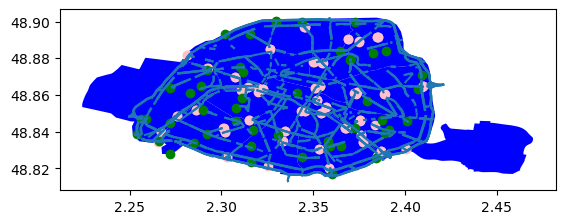

In [252]:
t_geo2 = test2["geometry"]
t_geo = test["geo_shape_list"]
t_geo3 = test3["geometry"]
t_geo4 = test4["geometry"]

p_t_g2 = gpd.GeoSeries(t_geo2)
p_t_g = gpd.GeoSeries(t_geo)
p_t_g3 = gpd.GeoSeries(t_geo3)
p_t_g4 = gpd.GeoSeries(t_geo4)

fig, ax = plt.subplots()
p_t_g4.plot(ax=ax, color="blue")
p_t_g2.plot(ax = ax, color="pink")
p_t_g3.plot(ax = ax, color="green")
p_t_g.plot(ax = ax)

plt.show()